In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
warnings.filterwarnings('ignore')

In [ ]:
files = {
    'cr_loan2.csv': '/content/cr_loan2.csv.xls'
}

# Load files into dataframes
def load_file_into_dataframe(file_name):
    df = pd.read_csv(files[file_name])
    return df

# Load the CSV files into dataframes
cr_loan = load_file_into_dataframe('cr_loan2.csv')



## Exploring and preparing data start

In [ ]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


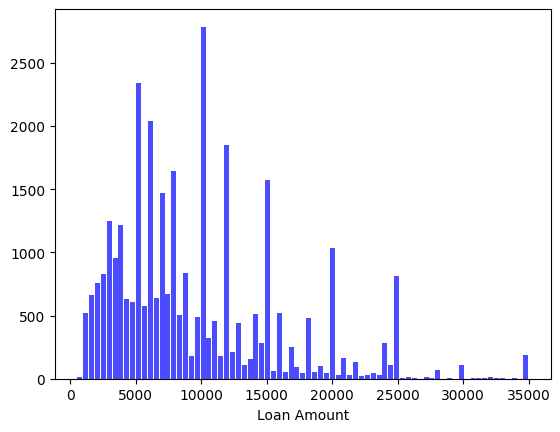

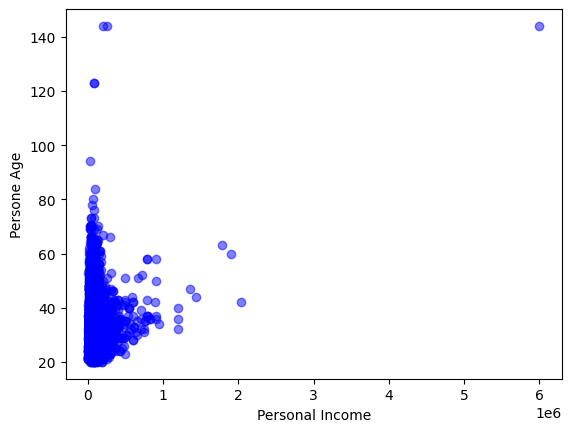

In [ ]:
### Explore the credit data
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()


# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [ ]:
### Crosstab and pivot tables

# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))


loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [ ]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [ ]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))



loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


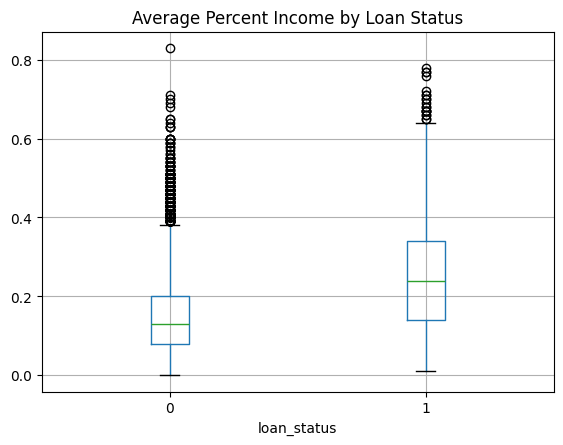

In [ ]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [ ]:
### Finding outliers with cross tables

# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max'))


person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [ ]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

In [ ]:
# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


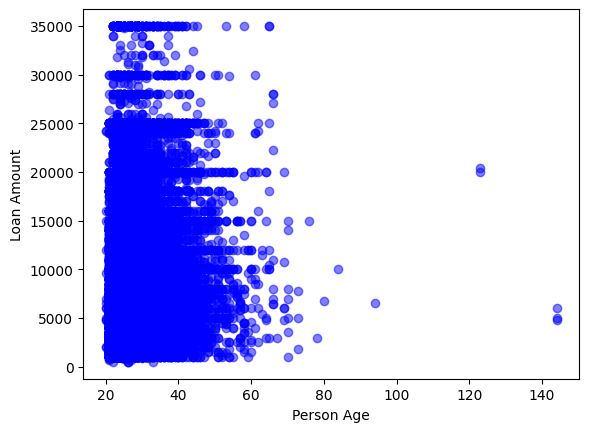

In [ ]:
### Visualizing credit outliers

# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()



In [ ]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

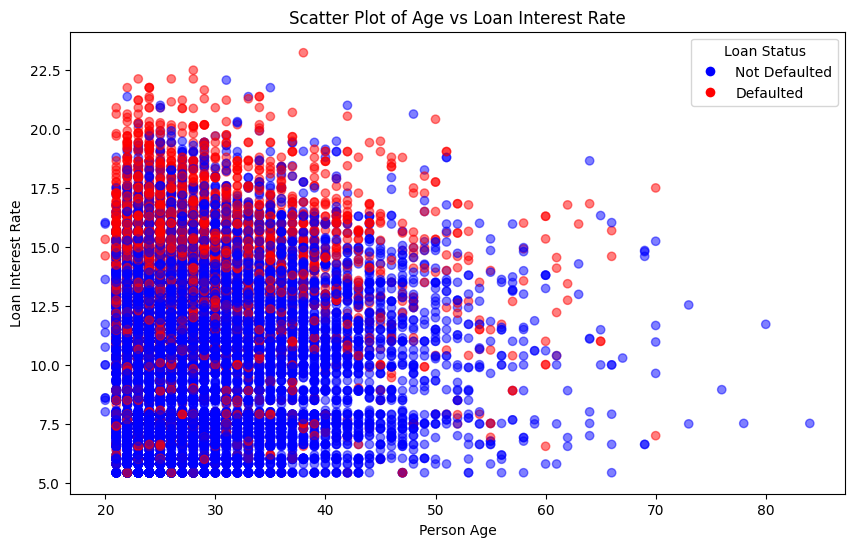

In [ ]:
# Define colors for the scatter plot
colors = ["blue", "red"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    cr_loan_new['person_age'],
    cr_loan_new['loan_int_rate'],
    c=cr_loan_new['loan_status'],
    cmap=matplotlib.colors.ListedColormap(colors),
    alpha=0.5
)

# Add labels and title
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.title("Scatter Plot of Age vs Loan Interest Rate")

# Create a legend
legend_labels = ['Not Defaulted', 'Defaulted']  # Adjust labels as per your data
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=8) for i in range(len(colors))]
plt.legend(handles, legend_labels, title="Loan Status")

# Display the plot
plt.show()


In [ ]:
# Check for missing values in each column of cr_loan
missing_values = cr_loan.isnull().sum()

# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Display the count of missing values
print(missing_values)


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [ ]:
### Removing missing data
# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

In [ ]:
cr_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29465 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29465 non-null  int64  
 1   person_income               29465 non-null  int64  
 2   person_home_ownership       29465 non-null  object 
 3   person_emp_length           29465 non-null  float64
 4   loan_intent                 29465 non-null  object 
 5   loan_grade                  29465 non-null  object 
 6   loan_amnt                   29465 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 29465 non-null  int64  
 9   loan_percent_income         29465 non-null  float64
 10  cb_person_default_on_file   29465 non-null  object 
 11  cb_person_cred_hist_length  29465 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.9+ MB


## Exploring and preparing data end

## Logistic Regression for Defaults start


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, y.values.ravel())

# Print model parameters
print("Model Parameters:", clf_logistic_single.get_params())

# Print the intercept and coefficient of the model
print("Intercept:", clf_logistic_single.intercept_)
print("Coefficient:", clf_logistic_single.coef_)


Model Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Intercept: [-4.45867803]
Coefficient: [[0.27149951]]


In [ ]:
# Define X data for multivariate logistic regression
X_multi = cr_loan_clean[['loan_int_rate', 'person_emp_length']]

# Define y data for the model
y = cr_loan_clean['loan_status']

# Create and train the multivariate logistic regression model
clf_logistic_multi = LogisticRegression(solver='lbfgs')
clf_logistic_multi.fit(X_multi, np.ravel(y))

# Print the intercept of the model
print("Intercept:", clf_logistic_multi.intercept_)

# Print the coefficients for each feature
print("Coefficients:", clf_logistic_multi.coef_)


Intercept: [-4.22530968]
Coefficients: [[ 0.27129029 -0.05154899]]


In [ ]:
### Creating training and test sets
from sklearn.model_selection import train_test_split
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 2.76431505e-01 -1.64430953e-02 -2.11664291e-05]]


In [ ]:
# Feature sets for the two models
X1_train = cr_loan_clean[['person_income', 'person_emp_length', 'loan_amnt']]
X2_train = cr_loan_clean[['person_income', 'loan_percent_income', 'cb_person_cred_hist_length']]

# Target variable (loan status)
y_train = cr_loan_clean['loan_status']

# Print the first five rows of each training set
print("X1_train features:\n", X1_train.head())
print("X2_train features:\n", X2_train.head())

# Create and train a model on the first feature set (X1_train)
clf_logistic1 = LogisticRegression(solver='lbfgs')
clf_logistic1.fit(X1_train, np.ravel(y_train))

# Create and train a model on the second feature set (X2_train)
clf_logistic2 = LogisticRegression(solver='lbfgs')
clf_logistic2.fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print("Coefficients for Model 1 (X1_train):\n", clf_logistic1.coef_)
print("Coefficients for Model 2 (X2_train):\n", clf_logistic2.coef_)


X1_train features:
    person_income  person_emp_length  loan_amnt
0          59000              123.0      35000
1           9600                5.0       1000
2           9600                1.0       5500
3          65500                4.0      35000
4          54400                8.0      35000
X2_train features:
    person_income  loan_percent_income  cb_person_cred_hist_length
0          59000                 0.59                           3
1           9600                 0.10                           2
2           9600                 0.57                           3
3          65500                 0.53                           2
4          54400                 0.55                           4
Coefficients for Model 1 (X1_train):
 [[-3.29462557e-05 -3.56328417e-02  1.15613927e-04]]
Coefficients for Model 2 (X2_train):
 [[-1.12897885e-05  7.16450907e+00  2.98012469e-03]]


Income (both person_income and loan_percent_income) has a minimal but negative relationship with the probability of default. Higher income tends to lower the likelihood of default, but the effect is very small in Model 1.

Employment length (person_emp_length) and credit history length (cb_person_cred_hist_length) show small effects, with employment length reducing the likelihood of default and credit history length slightly increasing it.

Loan amount (loan_amnt) has a very small positive relationship with default in Model 1, but the effect is negligible.

Loan percentage of income (loan_percent_income) in Model 2 is a significant factor: the higher the percentage of income allocated to the loan, the much higher the likelihood of default, based on the large positive coefficient.

In [ ]:
### One-hot encoding credit data

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [ ]:
### Predicting probability of default

X = cr_loan_prep[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_prep[['loan_status']]

# Use test_train_split to create the training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.233478
1            0      0.151029
2            0      0.040473
3            0      0.336758
4            0      0.471608


In [ ]:
### Default classification reporting
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

loan_status
0    10812
1      974
Name: count, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.82      0.97      0.89      9194
     Default       0.68      0.25      0.37      2592

    accuracy                           0.81     11786
   macro avg       0.75      0.61      0.63     11786
weighted avg       0.79      0.81      0.77     11786



In [ ]:
### Selecting report metrics

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[:2])

              precision    recall  f1-score   support

 Non-Default       0.82      0.97      0.89      9194
     Default       0.68      0.25      0.37      2592

    accuracy                           0.81     11786
   macro avg       0.75      0.61      0.63     11786
weighted avg       0.79      0.81      0.77     11786

(array([0.82112468, 0.67556468]), array([0.96562976, 0.25385802]), array([0.88753374, 0.36904094]), array([9194, 2592]))
(array([0.82112468, 0.67556468]), array([0.96562976, 0.25385802]))


0.8090955370778891


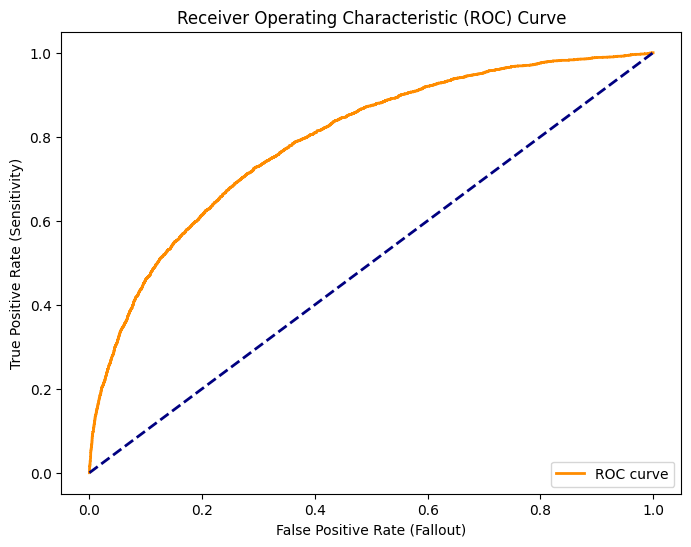

AUC Score: 0.7904986217863502


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)
print(clf_logistic.score(X_test, y_test))

# Get the probabilities for the positive class (default)
prob_default = preds[:, 1]

# Generate ROC curve data (false positive rate, true positive rate, thresholds)
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fallout, sensitivity, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (Fallout)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.show()

# Compute the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, prob_default)
print(f'AUC Score: {auc}')


model is fairly good at distinguishing between loans that default and those that don't.

In [ ]:
### Thresholds and confusion matrices.
from sklearn.metrics import confusion_matrix
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))



[[8878  316]
 [1934  658]]
[[8394  800]
 [1486 1106]]


In [ ]:
cr_loan_prep.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [ ]:
### How thresholds affect performance
avg_loan_amnt = cr_loan_prep['loan_amnt'].sum() / cr_loan_prep['loan_amnt'].count()
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

12206848.964421853


The estimated financial impact of missed defaults with the threshold set at 0.4 is approximately $12,206,848.96. This means that based on the current model's recall rate, this is the amount of loan money that could potentially go uncollected due to misclassified defaults (i.e., False Negatives).

In [ ]:
# List of thresholds to evaluate
thresh = np.array([0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65])

# Initialize empty lists to store the metrics for each threshold
def_recalls = []
nondef_recalls = []
accs = []

# Loop through each threshold
for threshold in thresh:
    # Reassign the values of loan status based on the current threshold
    preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > threshold else 0)

    # Calculate the recall and accuracy using precision_recall_fscore_support
    recall = precision_recall_fscore_support(y_test, preds_df['loan_status'], average=None)

    # Extract Default Recall (class 1) and Non-default Recall (class 0)
    default_recall = recall[1][1]  # Recall for Default (class 1)
    nondef_recall = recall[1][0]  # Recall for Non-default (class 0)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, preds_df['loan_status'])

    # Append the values to the respective lists
    def_recalls.append(default_recall)
    nondef_recalls.append(nondef_recall)
    accs.append(accuracy)

# Print the results for each threshold
print(f"Thresholds: {thresh}")
print(f"Default Recall: {def_recalls}")
print(f"Non-default Recall: {nondef_recalls}")
print(f"Accuracy: {accs}")


Thresholds: [0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475
 0.5   0.525 0.55  0.575 0.6   0.625 0.65 ]
Default Recall: [0.7650462962962963, 0.7249228395061729, 0.6809413580246914, 0.6350308641975309, 0.591820987654321, 0.5513117283950617, 0.5135030864197531, 0.466820987654321, 0.42669753086419754, 0.38503086419753085, 0.33834876543209874, 0.2970679012345679, 0.25385802469135804, 0.21682098765432098, 0.17901234567901234, 0.14891975308641975, 0.12037037037037036, 0.09683641975308642, 0.07253086419753087]
Non-default Recall: [0.6582553839460518, 0.7076354144006961, 0.7473352186208396, 0.7832281922993256, 0.8169458342397216, 0.8466391124646508, 0.871546660865782, 0.8959103763323907, 0.9129867304763977, 0.9276702197085055, 0.94420274091799, 0.9552969327822493, 0.9656297585381771, 0.9737872525560148, 0.981835979986948, 0.9870567761583642, 0.9909723732869262, 0.9939090711333478, 0.9955405699369154]
Accuracy: [0.6817410487018497, 0.7114372984897336, 0.7327337519090447

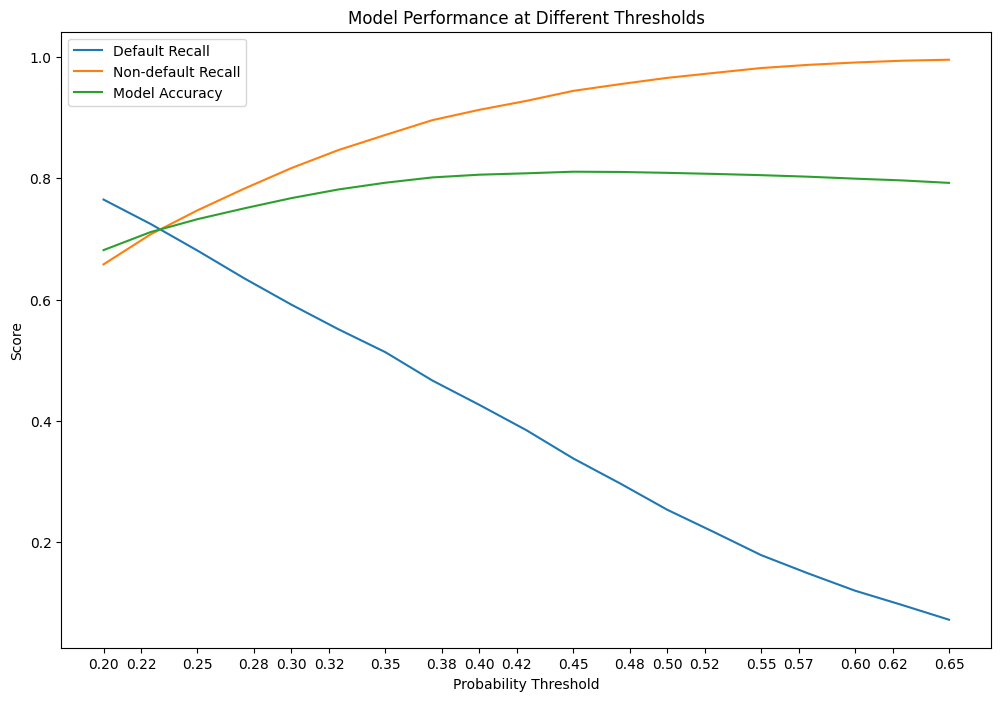

In [ ]:
plt.figure(figsize=(12, 8))

# Plot the results
ticks = [round(x, 2) for x in thresh]
plt.plot(thresh, def_recalls, label="Default Recall")
plt.plot(thresh, nondef_recalls, label="Non-default Recall")
plt.plot(thresh, accs, label="Model Accuracy")

# Adding labels and legend
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.ylabel("Score")
plt.title("Model Performance at Different Thresholds")
plt.legend()

# Show the plot
plt.show()


At a threshold of 0.22, the model's performance metrics (Default Recall, Non-default Recall, and Accuracy) converge, meaning that the values for all three metrics stabilize around this point. This suggests that the model is performing optimally or reaching a balance between correctly identifying defaults (class 1) and non-defaults (class 0) at this threshold. Adjusting the threshold further either leads to diminishing returns or trade-offs between recall and accuracy. The convergence at 0.22 indicates that it's a critical threshold where the model is well-calibrated for both classes, maximizing its performance.

## XGBoost for Defaults

In [ ]:
### Trees for defaults

# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.054824
1            0      0.653615
2            0      0.008805
3            0      0.095102
4            0      0.494541


In [ ]:
# Simulating sample data for demonstration
np.random.seed(0)
portfolio_size = 100
portfolio = pd.DataFrame({
    'gbt_prob_default': np.random.rand(portfolio_size),
    'lr_prob_default': np.random.rand(portfolio_size),
    'lgd': np.random.uniform(0.1, 0.5, portfolio_size),
    'loan_amnt': np.random.randint(5000, 50000, portfolio_size)
})

# Step 1: Print the first five rows of the portfolio dataframe
print(portfolio.head())

# Step 2: Create expected loss columns for each model using the formula
portfolio['gbt_expected_loss'] = portfolio['gbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Step 3: Print the sum of the expected loss for lr
print('LR expected loss:', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss:', np.sum(portfolio['gbt_expected_loss']))


   gbt_prob_default  lr_prob_default       lgd  loan_amnt
0          0.548814         0.677817  0.224718       6384
1          0.715189         0.270008  0.378537      18867
2          0.602763         0.735194  0.251101       5063
3          0.544883         0.962189  0.171841      41767
4          0.423655         0.248753  0.109871       8988
LR expected loss: 384749.81333954004
GBT expected loss: 354902.6439528185


 we trained an XGBoost model (GBT) to predict loan defaults by fitting it on the training data and using it to generate probabilistic predictions on the test set. These predicted probabilities of default were compared to the actual loan statuses to assess the model’s performance.

 Next, we simulated a loan portfolio of 100 loans, where each loan had predicted probabilities of default from both the XGBoost (GBT) and Logistic Regression (LR) models, along with values for Loss Given Default (LGD) and loan amounts. We then calculated the expected loss for each loan using the formula
Expected Loss
=
Probability of Default
×
LGD
×
Loan Amount
Expected Loss=Probability of Default×LGD×Loan Amount, and computed the total expected loss for the entire portfolio under both models.

 The total expected loss for the LR model was approximately 384,749.81, while for the GBT model, it was 354,902.64. This analysis showed that the GBT model resulted in a lower expected loss, indicating it might be slightly better at predicting lower-risk loans compared to the LR model.

In [ ]:
def calculate_psi(expected, actual, buckettype='bins', buckets=10):
    """Calculate the PSI (Population Stability Index) between expected and actual distributions."""
    # Binning the predictions into specified number of buckets
    expected_perc = np.percentile(expected, np.linspace(0, 100, buckets + 1))
    actual_perc = np.percentile(actual, np.linspace(0, 100, buckets + 1))

    expected_freq = np.histogram(expected, expected_perc)[0] / len(expected)
    actual_freq = np.histogram(actual, actual_perc)[0] / len(actual)

    # Calculate PSI
    psi_value = np.sum((expected_freq - actual_freq) * np.log(expected_freq / actual_freq))
    return psi_value

# PSI for XGBoost and Logistic Regression models
psi_gbt = calculate_psi(gbt_preds[:, 1], gbt_preds[:, 1])  # Probability of default for XGBoost
psi_lr = calculate_psi(preds[:, 1], preds[:, 1])    # Probability of default for Logistic Regression

print(f"PSI for XGBoost: {psi_gbt}")
print(f"PSI for Logistic Regression: {psi_lr}")


PSI for XGBoost: 0.0
PSI for Logistic Regression: 0.0


In [ ]:
from sklearn.metrics import roc_curve

def ks_statistic(y_true, y_scores):
    """Calculate KS Statistic"""
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    ks_value = max(tpr - fpr)
    return ks_value

# KS statistic for XGBoost and Logistic Regression models
ks_gbt = ks_statistic(y_test, gbt_preds[:, 1])
ks_lr = ks_statistic(y_test, preds[:, 1])

print(f"KS Statistic for XGBoost: {ks_gbt}")
print(f"KS Statistic for Logistic Regression: {ks_lr}")


KS Statistic for XGBoost: 0.5389831700491732
KS Statistic for Logistic Regression: 0.4328947924975225


In [ ]:
def gini_coefficient(y_true, y_scores):
    """Calculate Gini Coefficient"""
    auc = roc_auc_score(y_true, y_scores)
    return 2 * auc - 1

# Gini coefficient for XGBoost and Logistic Regression models
gini_gbt = gini_coefficient(y_test, gbt_preds[:, 1])
gini_lr = gini_coefficient(y_test, preds[:, 1])

print(f"Gini Coefficient for XGBoost: {gini_gbt}")
print(f"Gini Coefficient for Logistic Regression: {gini_lr}")


Gini Coefficient for XGBoost: 0.6943682406937428
Gini Coefficient for Logistic Regression: 0.5809972435727004


In [82]:
from sklearn.metrics import r2_score

def r_squared(y_true, y_preds):
    """Calculate R-squared"""
    return r2_score(y_true, y_preds)

# R-squared value for XGBoost and Logistic Regression models
r2_gbt = r_squared(y_test, gbt_preds[:, 1])
r2_lr = r_squared(y_test, preds[:, 1])

print(f"R-squared for XGBoost: {r2_gbt}")
print(f"R-squared for Logistic Regression: {r2_lr}")


R-squared for XGBoost: 0.32181763648986816
R-squared for Logistic Regression: 0.20520238264955115


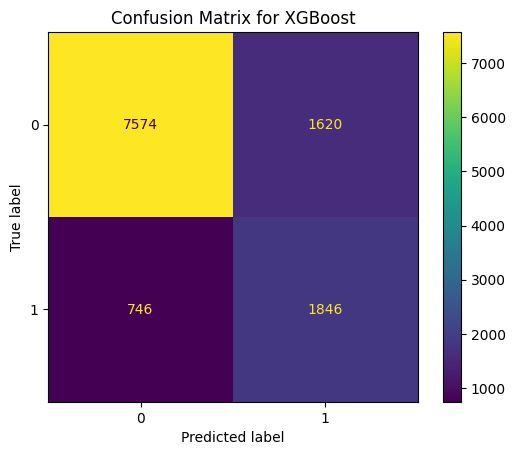

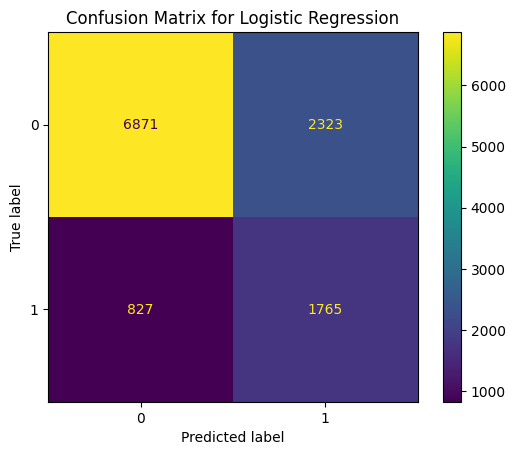

Confusion Matrix for XGBoost:
[[7574 1620]
 [ 746 1846]]
Confusion Matrix for Logistic Regression:
[[6871 2323]
 [ 827 1765]]


In [ ]:
def confusion_matrix_analysis(y_true, y_preds, model_name):
    """Calculate and display Confusion Matrix"""
    cm = confusion_matrix(y_true, y_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()
    return cm

y_pred_gbt = gbt_preds[:, 1] > 0.25
y_pred_lr = preds[:, 1] > 0.25

# Confusion Matrix for XGBoost and Logistic Regression models
cm_gbt = confusion_matrix_analysis(y_test, y_pred_gbt, "XGBoost")
cm_lr = confusion_matrix_analysis(y_test, y_pred_lr, "Logistic Regression")

print(f"Confusion Matrix for XGBoost:\n{cm_gbt}")
print(f"Confusion Matrix for Logistic Regression:\n{cm_lr}")


Population Stability Index (PSI): The PSI compares the distribution of predicted probabilities in the current model versus a reference model (or expected distribution). For both XGBoost and Logistic Regression, the PSI values are 0.0, suggesting no significant shift in the distribution, which typically indicates the model's stability.

KS Statistic: The Kolmogorov-Smirnov (KS) Statistic measures the separation between the cumulative distribution of positive and negative cases. A higher KS value indicates better model separation. For our models, the KS Statistic for XGBoost is 0.54, which is higher than Logistic Regression (0.43), suggesting better predictive power for XGBoost.

Gini Coefficient: The Gini Coefficient, derived from the AUC (Area Under the ROC Curve), quantifies model discrimination capability. XGBoost has a Gini Coefficient of 0.69, while Logistic Regression's is 0.58, indicating that XGBoost has better discriminatory power.

R-squared: This metric explains how well the model predictions match the actual outcomes. XGBoost achieved an R-squared value of 0.32, whereas Logistic Regression scored 0.21, which indicates that XGBoost provides a slightly better fit to the data.

Confusion Matrix: The confusion matrix is used to evaluate the number of correct and incorrect predictions (True Positives, True Negatives, False Positives, and False Negatives). Visualizing and interpreting the confusion matrix helps understand the classification performance of both models in terms of prediction accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the XGBoost model
clf_gbt = xgb.XGBClassifier()

# Define parameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=clf_gbt, param_grid=param_grid, cv=3, n_jobs=-1, scoring='roc_auc')

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model using the best hyperparameters
clf_gbt_tuned = xgb.XGBClassifier(**best_params)
clf_gbt_tuned.fit(X_train, y_train)

# Predict with the tuned model
gbt_preds_tuned = clf_gbt_tuned.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df_tuned = pd.DataFrame(gbt_preds_tuned[:,1][0:5], columns = ['prob_default'])
true_df_tuned = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df_tuned.reset_index(drop=True), preds_df_tuned], axis=1))


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}
   loan_status  prob_default
0            0      0.068845
1            0      0.273014
2            0      0.016416
3            0      0.118289
4            0      0.444381
